### Project 1: Perform 'Exploratory Data Analysis (EDA) on Retail Sales Data'

#### Steps to be followed:
##### *Data Loading and Cleaning
##### *Descriptive Statistics
##### *Time Series Analysis
##### *Customer and Product Analysis
##### *Visualization
##### *Recommendations


### Data Loading and Cleaning

In [65]:
# Importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# To download dataset
!pip install opendatasets

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ------------------- -------------------- 41.0/82.7 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 82.7/82.7 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with st


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import opendatasets as od

In [8]:
od.download("https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  Ragini Kumari


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset


100%|█████████████████████████████████████████████████████████████████████████████| 11.2k/11.2k [00:00<00:00, 5.60MB/s]

In [11]:
import os

In [22]:
os.listdir('.\\retail-sales-dataset')

['retail_sales_dataset.csv']

In [37]:
# Reading the dataset
data = pd.read_csv('retail_sales_dataset.xls')
print("Data has been successfully imported")
data.head()

Data has been successfully imported


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### From above command we can analyze that there are 1000 entries with 9 columns

In [46]:
data.shape

(1000, 9)

In [40]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

#### So there is no any null entries.

In [55]:
print(data.duplicated().sum())

0


#### There were no duplicates to remove

## Descriptive Statistics
#### Let describe  the data to calculate the basic statistic

In [41]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [47]:
print(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())


   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


### The mean age of people visiting the shop is 41 and 75% of the shoppers are 53 years or below. The median of the age is 42.¶

### The mode for age is 43,64. The mode for Quantity is 4, price per unit is 50, and total amount is 50.¶


# Time Series Analysis

C:\Users\itsra\AppData\Local\Temp\ipykernel_11260\1137566055.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()


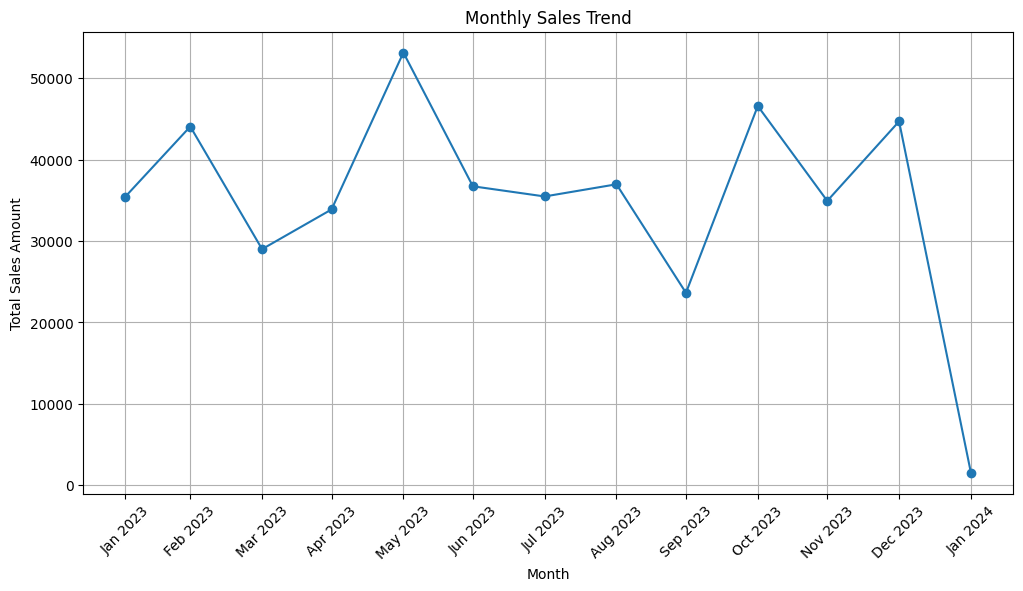

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize = (12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o') 
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45) 
plt.show()

### There was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023.

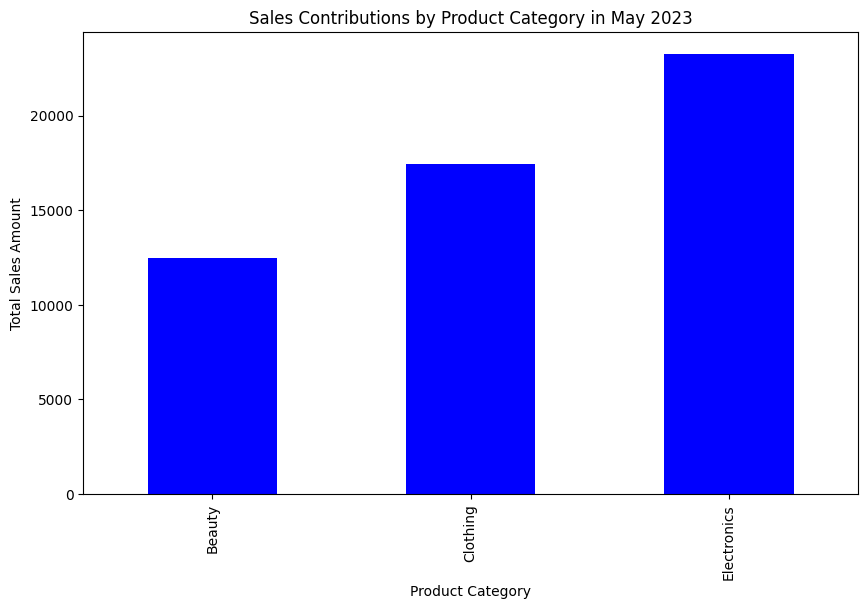

The total sales in the month of May is: 53150


In [51]:
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

### Electronics contributed the maximum sales amount in the max sales month.

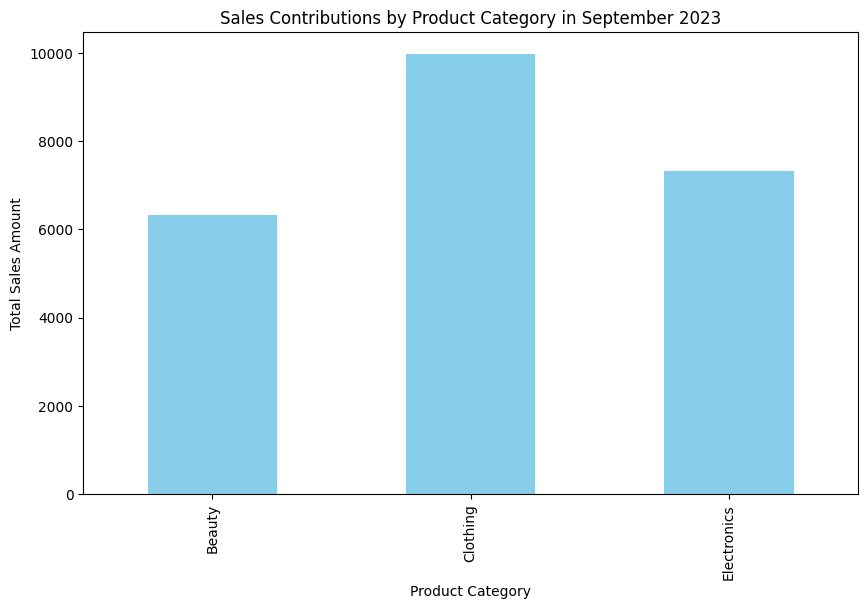

The total sales in the month of September is: 23620


In [52]:
start_date = '2023-09-01'
end_date = '2023-09-30'
data_september = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

category_sales_september = data_september.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_september.plot(kind='bar', color='skyblue')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_september = data_september['Total Amount'].sum()
print(f"The total sales in the month of September is: {total_sales_september}")


### Beauty was sold the least in the least sold month.

# Customer and Product Analysis and Visualization

<Axes: >

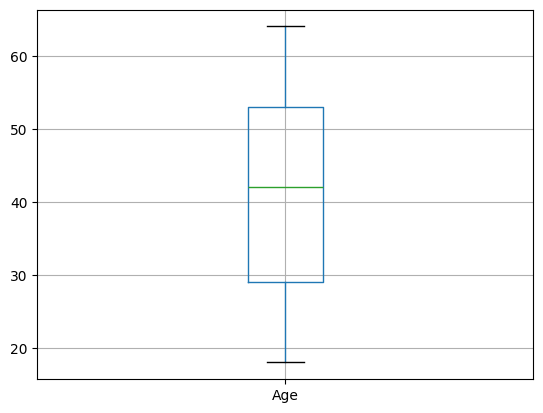

In [75]:
data.boxplot(column='Age',showfliers=True)

### The shoppers age distribution mostly lies between 29 and 53.

In [74]:
cutoff_date = pd.to_datetime('2024-06-30')
data_cutoff = data[data['Date'] < cutoff_date]
data_cutoff_sorted = data_cutoff.sort_values(by='Total Amount', ascending=False)
print(data_cutoff_sorted[['Customer ID','Total Amount','Product Category']].head(5))

    Customer ID  Total Amount Product Category
571     CUST572          2000         Clothing
88      CUST089          2000      Electronics
502     CUST503          2000           Beauty
560     CUST561          2000         Clothing
831     CUST832          2000           Beauty


### The top 5 customers by total amount who have not purchased in the past 6 months are printed above with their preferred product categories.¶
### They can be targeted for personalized marketing with their preferred product categories.¶

<Axes: xlabel='Gender'>

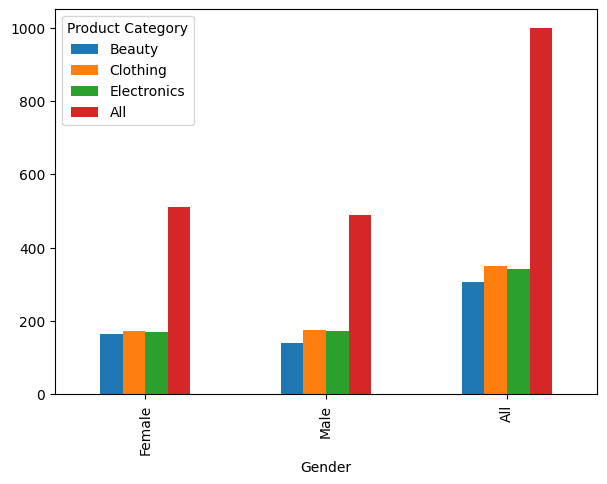

In [61]:
pd.crosstab(data['Gender'],data['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

### Female bar chart shows that there is no specific preference of purchase between different product categories, while for male there is a significant lesser preference for beauty products.

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


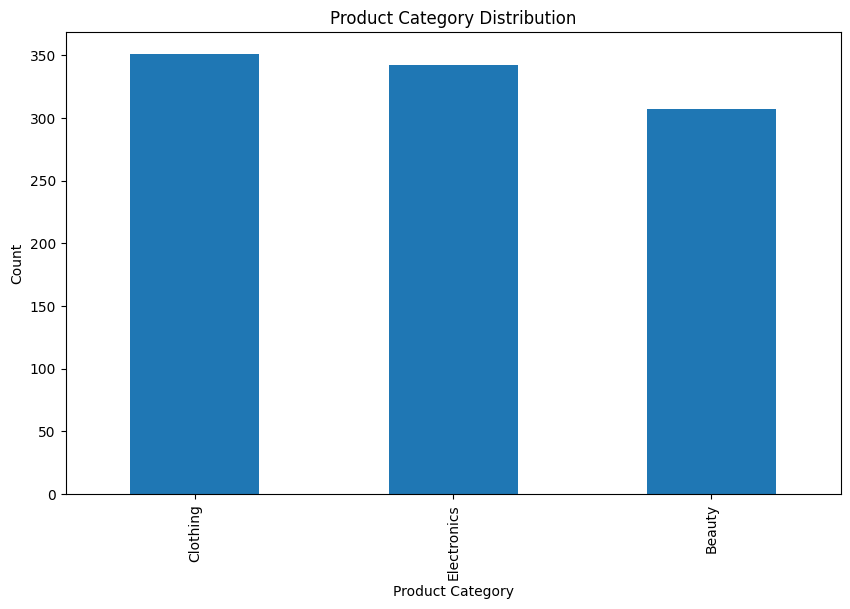

In [62]:
product_category_distribution = data['Product Category'].value_counts()
print(product_category_distribution)

product_category_distribution.plot(kind='bar', figsize=(10, 6), title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

### Here we can see that clothing products are sold more in terms of transactions and beauty products are transacted less, although there is no big difference between clothing and electronics both being transacted very high.¶

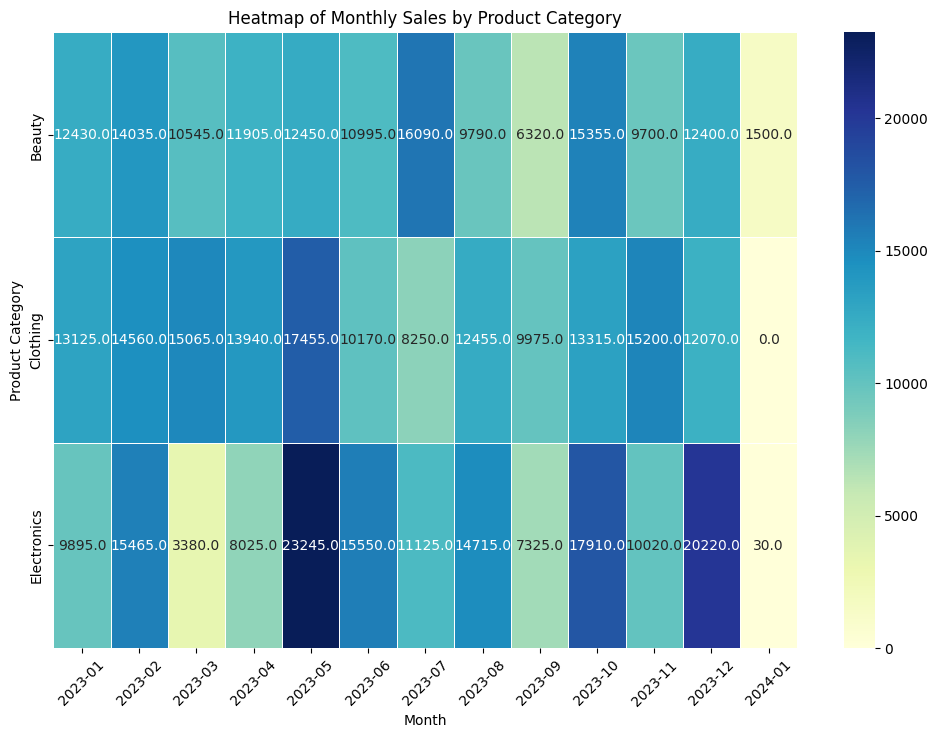

In [66]:
data['Month'] = data['Date'].dt.to_period('M')

pivot_table = data.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Heatmap of monthly sales
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()

### Here we can see that in the month of May 2023, Electronics contributed the most on that month and also overall. Similarly, it contributed the least in the month of March 2023 if we exclude 2024.¶

### Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most. Beauty had the most sales in July and the least in September.

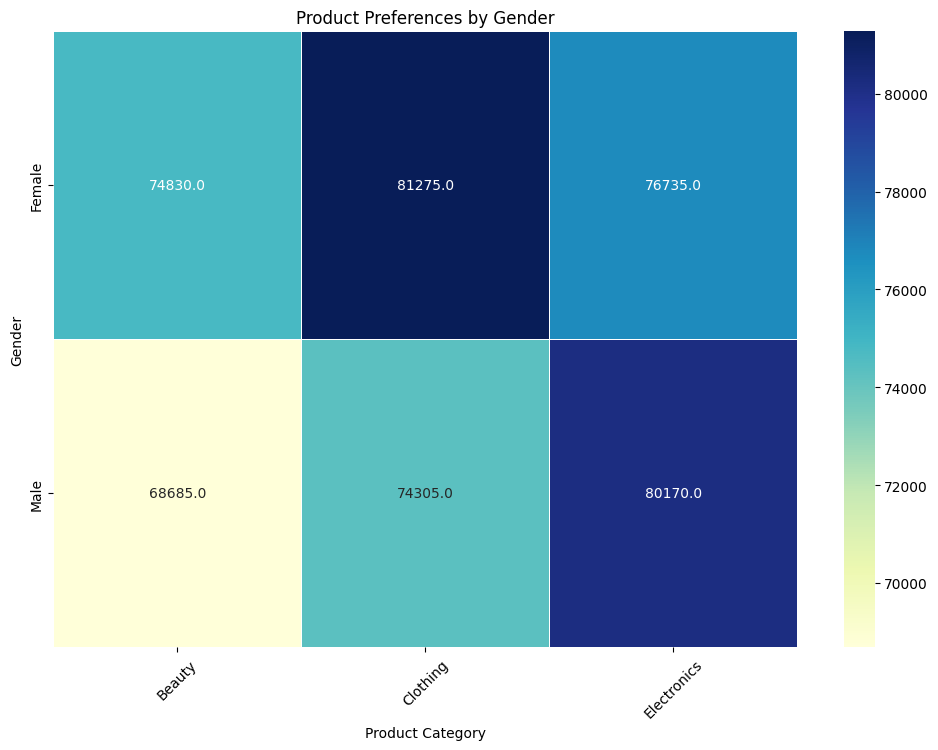

In [67]:
gender_product_sales = data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

### Here, females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products

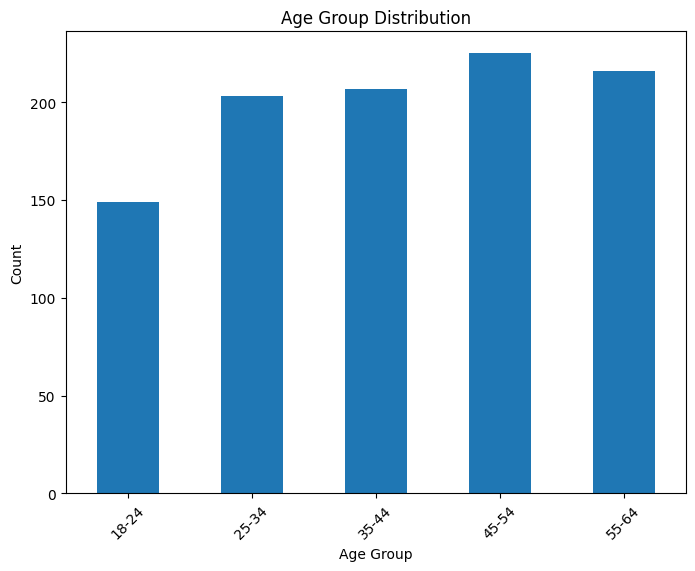

In [72]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = data['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds

# Some Reccomendations based on EDA

#### 1. The month of May especially the date of 16th May is the sales leader across the months with electronics dominating the sales. Hence to maximize the revenue during that period or date further opportunity to market the Electronic products can be explored followed by the Clothing products.
#### 2. Age group 29-34 targeted for Clothing products as it is generating significantly higher revenue compared to other product categories in this age group.
#### 3. By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.
#### 4. Since females show a tendency to buy Beauty products more frequently but spending least, the shop can introduce more high value female Beauty products to generate more revenue from the female customers.
#### 5. Top 5 customers are potential customer churn risks. They can be targeted for personalized marketing with their preferred product categories.